# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents-nightly pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [933 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRele

AttributeError: ignored

In [0]:
from google.colab import files
from PIL import Image
from io import BytesIO

# Learning to Optimize Rewards: 

- in ***Reinforcement Learning***, a software ***agent*** makes ***observations*** and takes ***actions*** within an ***environment*** to receive ***rewards***: 
 - the agent's objective is to learn to act in a way that maximizes its expected rewards over time 
 - to maximize "pleasure" and minimize "pain"

Saving 18-1.PNG to 18-1 (1).PNG


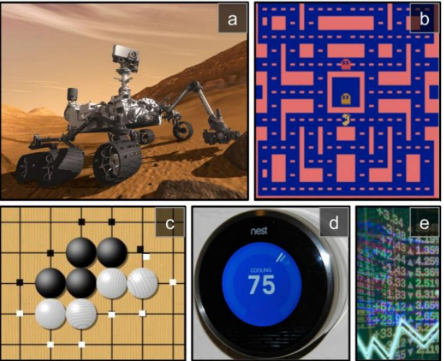

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['18-1.PNG']))
im

# Policy Search

- the software agent determines its actions through its ***policy***: 
 - the policy could be a neural network taking observations as inputs and outputting the action to take
 - the policy can be any algorithm, and doesn't necessarily have to be deterministic or observe the environment
 - a policy with randomness = a ***stochastic policy***
---
- explore the ***policy space*** with ***genetic algorithms*** (a ***policy search***): 
 - could randomly create a first generation of 100 policies, try them out, kill the worst 80, then make the 20 survivors produce 4 offspring each (which constitute the second generation) 
 - continue iterating through generations this way until you find a good policy
 - an offspring is a copy of its parent w/ random variation
---
- another approach is called ***policy gradients***: 
 - Gradient Descent, but in the opposite direction as to maximize instead of minimize (***Gradient Ascent***) 
 - evaluating the gradients of the rewards with regard to the policy parameters, then tweaking these parameters by following the gradients toward higher rewards

# Introduction to OpenAI Gym

- in order to train, you first need to have a working environment (can be challenging): 
 - if you want to progam an agent that will learn to play an Atari game, you'll need an Atari game simulator (a **simulated environment**)
- we'll be using [OpenAI gym](https://gym.openai.com/), a great toolkit for developing and comparing Reinforcement Learning algorithms: 
 - start by importing `gym`

In [0]:
import gym

In [0]:
# list of available environments
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

- the Cart-Pole is a very simple 2D environment composed of a cart that can move left or right, with pole placed vertically on top of it: 
 - the agent must move the cart left or right to keep the pole upright

In [0]:
# creating the CartPole environment
env = gym.make('CartPole-v1')

- let's initialize the environment by calling is `reset()` method, which returns an observation:

In [0]:
env.seed(42)
obs = env.reset()

NameError: ignored

- observations depend on the type of environment:
 - for the CartPole environment, each observation is a 1D NumPy array containing four floats:

In [0]:
obs

array([-0.01258566, -0.00156614,  0.04207708, -0.00180545])

- these floats represent the cart's horizontal position (`0.0` = center), its velocity (positive means right), the angle of the pole (`0.0` = vertical), and its angular velocity (positive means clockwise) 
---
- an environment can be visualized by calling its `render()` method, and you can pick the rendering mode (the rendering options depend on the environment)

In [0]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [0]:
env.render()

True

Saving 18-2.PNG to 18-2 (1).PNG


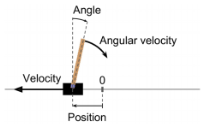

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['18-2.PNG']))
im

- in this example, we will set `mode="rgb_array"` to get an image of the environment as a NumPy array:

In [0]:
img = env.render(mode="rgb_array")
img.shape # height, width, channels (3 = Red, Green, Blue)

(400, 600, 3)

In [0]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

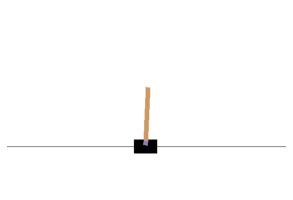

In [0]:
plot_environment(env)
plt.show()

- let's ask the environment what actions are possible:

In [0]:
env.action_space

Discrete(2)

- `Discrete(2)` means that the possible actions are integers 0 and 1, which represent accelerating left (0) or right (1)
- since the pole is leaning toward the right (`obs[2] > 0`), let's accelerate the card toward the right: 

In [0]:
action = 1 # accelerate right

In [0]:
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

In [0]:
reward

1.0

In [0]:
done

False

In [0]:
info

{}

- `obs` is the new observation 
- in this environment, you get a `reward` of 1.0 at every step as the goal is to keep the episode running for as long as possible
- `done` will be `True` when the episode is over, which will happen when the pole tilts too much, or after 200 steps, in which case you have won
- `info` is an environment-specific dictionary, which can provide additional informationm 
---
- once finished with an environment, call its `close()` method to free resources

In [0]:
if done:
    obs = env.reset()

## Simple Hard-Coded Policy

- we must define a ***policy*** to keep the pole upright: 
 - again, this is the strategy the agent will use to determine its action at each step
---
- let's hardcode a simple policy that accelerates left when the pole is leaning toward the left and vice versa: 
 - we'll run this policy to see te average rewards over 500 episodes

In [0]:
env.seed(42)

def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [0]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.718, 8.858356280936096, 24.0, 68.0)

- even with 500 tries, this policy never managed to keep the pole upright for more than 68 consecutive steps
- let's see if a neural network can come up with a better policy:

## Neural Network Policies

- similar to our previous policy, this neural network will take an obvservation as input and output the action to be executed: 
 - more precisely, it will estimate the probability for each action and then select an action randomly according to the estimated probabilities
- for the CartPole environment, there's just two possible actions (left or right), so we only need one output neuron: 
 - it will output the probability of action 0 (left) and action 1 (right)
 - for example, if it output 0.7, then we will pick action 0 with 70% probability or action 1 with 30% probability

Saving 18-3.PNG to 18-3.PNG


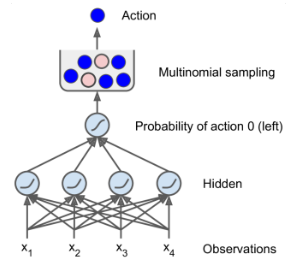

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['18-3.PNG']))
im

- the randomness allows the agent to discover the right balance between ***exploring*** new actions and ***exploiting*** actions that are known to work well: 
 - if you try a dish and love it, but everything on the menu looks good, you shouldn't simply keep ordering the same dish, as there might be others you'll like
---
- the CartPole problem is as simple as things get: 
 - the observations are noise-free and they contain the environment's full state
- in this particular environment, the past actions and observations can safely be ignored, since each observation contains the environment's full state
---
- let's build this neural network policy:

In [0]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

n_inputs = 4 # == env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

- the number of inputs is the size of the observation space (4 objects in `obs`) 
- 5 neurons because simple problem
- finally, we want to output a single probability (probability of going left), so we have a single output neuron using the sigmoid action function: 
 - if there were more than two possible actions, there would be one output neuron per action, and we would use the softmax activation function instead

## Evaluating Actions: The Credit Assignment Problem

- if we knew the best action was at each step, we could train the neural network as usual, by minimizing the cross entropy between the estimated probability distribution and the target probability distribution
- in Reinforcement Learning, however, the only guidance the agent receives is through rewards, which are typically sparse and delayed 
- for example, if the agent manages to balance the pole for 100 steps, how can it know which of the 100 actions, and which were bad:
 - sure, the pole fell after the last action, but surely it is not entirely responsible
 - this is called the ***credit assignment problem***, as when the agent gets a reward, it is hard for it to know which actions should get credited (or blamed) for it
---
- a common strategy is to evaluate an action based on the sum of all the rewards that come after it, usually applying a ***discount factor*** at each step: 
 - this sum of discounted rewards is called the ***action's return***

Saving 18-4.PNG to 18-4.PNG


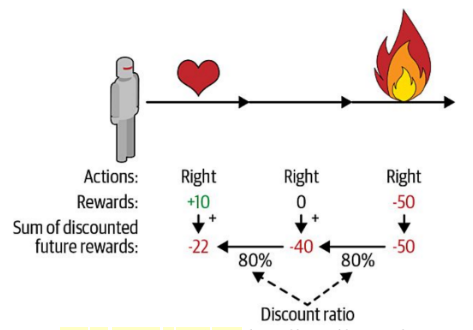

In [0]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['18-4.PNG']))
im

- typical discount factors vary from 0.9 to 0.99: 
 - with a reward discount factor of 0.95, rewards 13 steps into the future count for roughly half as much as immediate rewards
 - with a reward discount factor of 0.99, rewards 69 steps into the future count for roughly half as much as immediate rewards
---
- we want to estimate how much better or worse an action is compared to the other possible actions on average (***action advantage***): 
 - we must run many episodes and normalize all the action returns (subtracting mean and dividing by standard deviation)
 - after, we can assume that actions with a negative advantage were bad while actions with a positive advantage were good

## Policy Gradients

- as discussed earlier, PG algorithms optimize the parameters of a policy by following the gradients toward higher rewards
- ***REINFORCE Algorithms*** are a popular class of PG algorithms
- here is a common variant: 
 - 1) let the neural network policy play the game several times, and at each step, compute the gradients that would make the chosen action even more likely (but don't apply these gradients yet)
 - 2) after several episodes, compute each action's advantage
 - 3) if an action's advantage is positive, apply the gradients computed in step 1) to increase the frequency of this action (as a positive action advantage means the action is good); if bad, apply the opposite gradients to decrease the frequency
 4) finally, compute the mean of all the resulting gradient vectors and use it to perform a Gradient Descent step
---
- let's use `tf.keras` to implement this algorithm: 

In [0]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

- now let's create another function that will rely on `play_one_step()` to play multiple episodes, returning all the rewards and gradients for each episode and each step:

In [0]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

- the algorithm will use `play_multiple_episodes()` to play the game several times, however, we still need a few more functions
- this next function will compute the sum of future discounted rewards at each step:

In [0]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

- this next function will normalize all these discounted rewards (returns) across many episodes by subtracting the mean and dividing by the standard deviation:

In [0]:
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

- let's say there were 3 actions, and after each action there was a reward:
 - first 10, then 0, then -50
 - if we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22

In [0]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

In [0]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]